In [1]:
import numpy as np
import matplotlib.pyplot as plt

<>:44: SyntaxWarning: invalid escape sequence '\c'
<>:44: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_4243/1371958860.py:44: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("Temperatura ($^\circ$C)")


126


Text(0.5, 0, 'Temperatura ($^\\circ$C)')

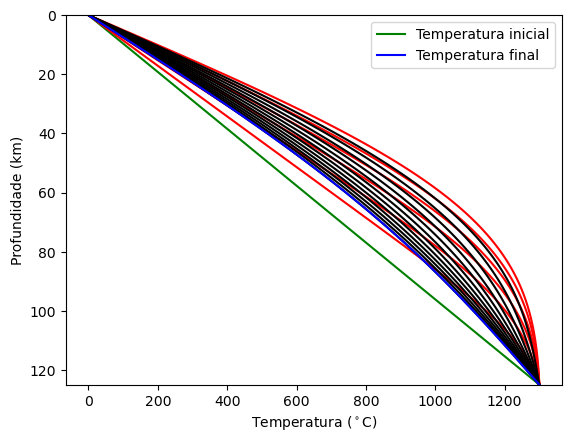

In [2]:
a = 125_000.0
dz = 1000.0
n = int(a//dz)+1
print(n)
z = np.linspace(0.0,a,n)

seg_por_ano = 365.0*24.0*60.0*60.0

t_rift = 30_000_000.0 #duração da fase rifte em anos
t = -t_rift

beta = 2.0 #fator de estiramento litosférico beta
kappa = 1.0E-6 #difusividade térmica

G = np.log(beta)/(t_rift*seg_por_ano)

dt = 1000.0 #passo de tempo em anos
fac = dt*seg_por_ano*kappa/dz**2
T1 = 1300.0
T = z*T1/a

tprint = t+5.0E6

plt.plot(T,z/1000,"g",label="Temperatura inicial")
plt.ylim(a/1000,0)
cor="r"
while t<=60.0E6:
  T[1:-1] += fac*(T[2:]-2*T[1:-1]+T[:-2]) + \
              dt*seg_por_ano*G*z[1:-1]*(T[2:]-T[:-2])/(2*dz)

  t+=dt

  if(t>=tprint):
    plt.plot(T,z/1000,cor)
    tprint+=5.0E6

  if (t>0):
    G=0.0
    cor = "k"

plt.plot(T,z/1000,"b",label="Temperatura final")
plt.legend()
plt.ylabel("Profundidade (km)")
plt.xlabel("Temperatura ($^\circ$C)")

In [3]:
def jarvis_heat(t_rift,beta):
  a = 125_000.0
  dz = 1000.0
  n = int(a//dz)+1
  print(n)
  z = np.linspace(0.0,a,n)

  seg_por_ano = 365.0*24.0*60.0*60.0

  t = -t_rift

  kappa = 1.0E-6 #difusividade térmica

  G = np.log(beta)/(t_rift*seg_por_ano)

  dt = 1000.0 #passo de tempo em anos
  fac = dt*seg_por_ano*kappa/dz**2
  T1 = 1300.0
  T = z*T1/a

  k = 4.0 #W/m/K (condutividade)
  qq = [-k*(T[0]-T[1])/dz]
  tt = [-t_rift]

  tprint = t+100_000.0

  cor="r"
  while t<=60.0E6:
    T[1:-1] += fac*(T[2:]-2*T[1:-1]+T[:-2]) + \
                dt*seg_por_ano*G*z[1:-1]*(T[2:]-T[:-2])/(2*dz)

    t+=dt

    if(t>=tprint):
      qq = np.append(qq,-k*(T[0]-T[1])/dz)
      tt = np.append(tt,t)
      tprint+=100_000.0

    if (t>0):
      G=0.0
      cor = "k"

  return(tt,qq)

In [4]:
tt,qq20 = jarvis_heat(20.0E6,2.0)


126
